In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('segments_and_depth.csv')
df_sorted = df.sort_values(by='variables')

def preprocess_df(filepath, methods):
    df = pd.read_csv(filepath)
    df = df.drop(columns=['pbid'])
    df = df[df['ARG'] <= 100000]
    grouped = df.groupby(['variables', 'method'], as_index=False).agg({
        'iteration_count': 'mean',
        'classcial': 'mean',
        'run_times': 'mean',
        'ARG': 'mean',
        'in_constraints_probs': 'mean',
        'best_solution_probs': 'mean',
    })
    values = ["variables", "ARG", 'best_solution_probs', 'classcial', 'in_constraints_probs', 'run_times', 'iteration_count']
    pivot = grouped.pivot(index='variables', columns='method', values=values)
    pivot = pivot.reindex(columns=pd.MultiIndex.from_product([values, methods]))
    return pivot

pivot_df_1 = preprocess_df('large_evaluation.csv', methods=['ChocoSolver', 'RasenganSolver'])
pivot_df_2 = preprocess_df('noisy_evaluation.csv', methods=['RasenganSegmentedSolver'])

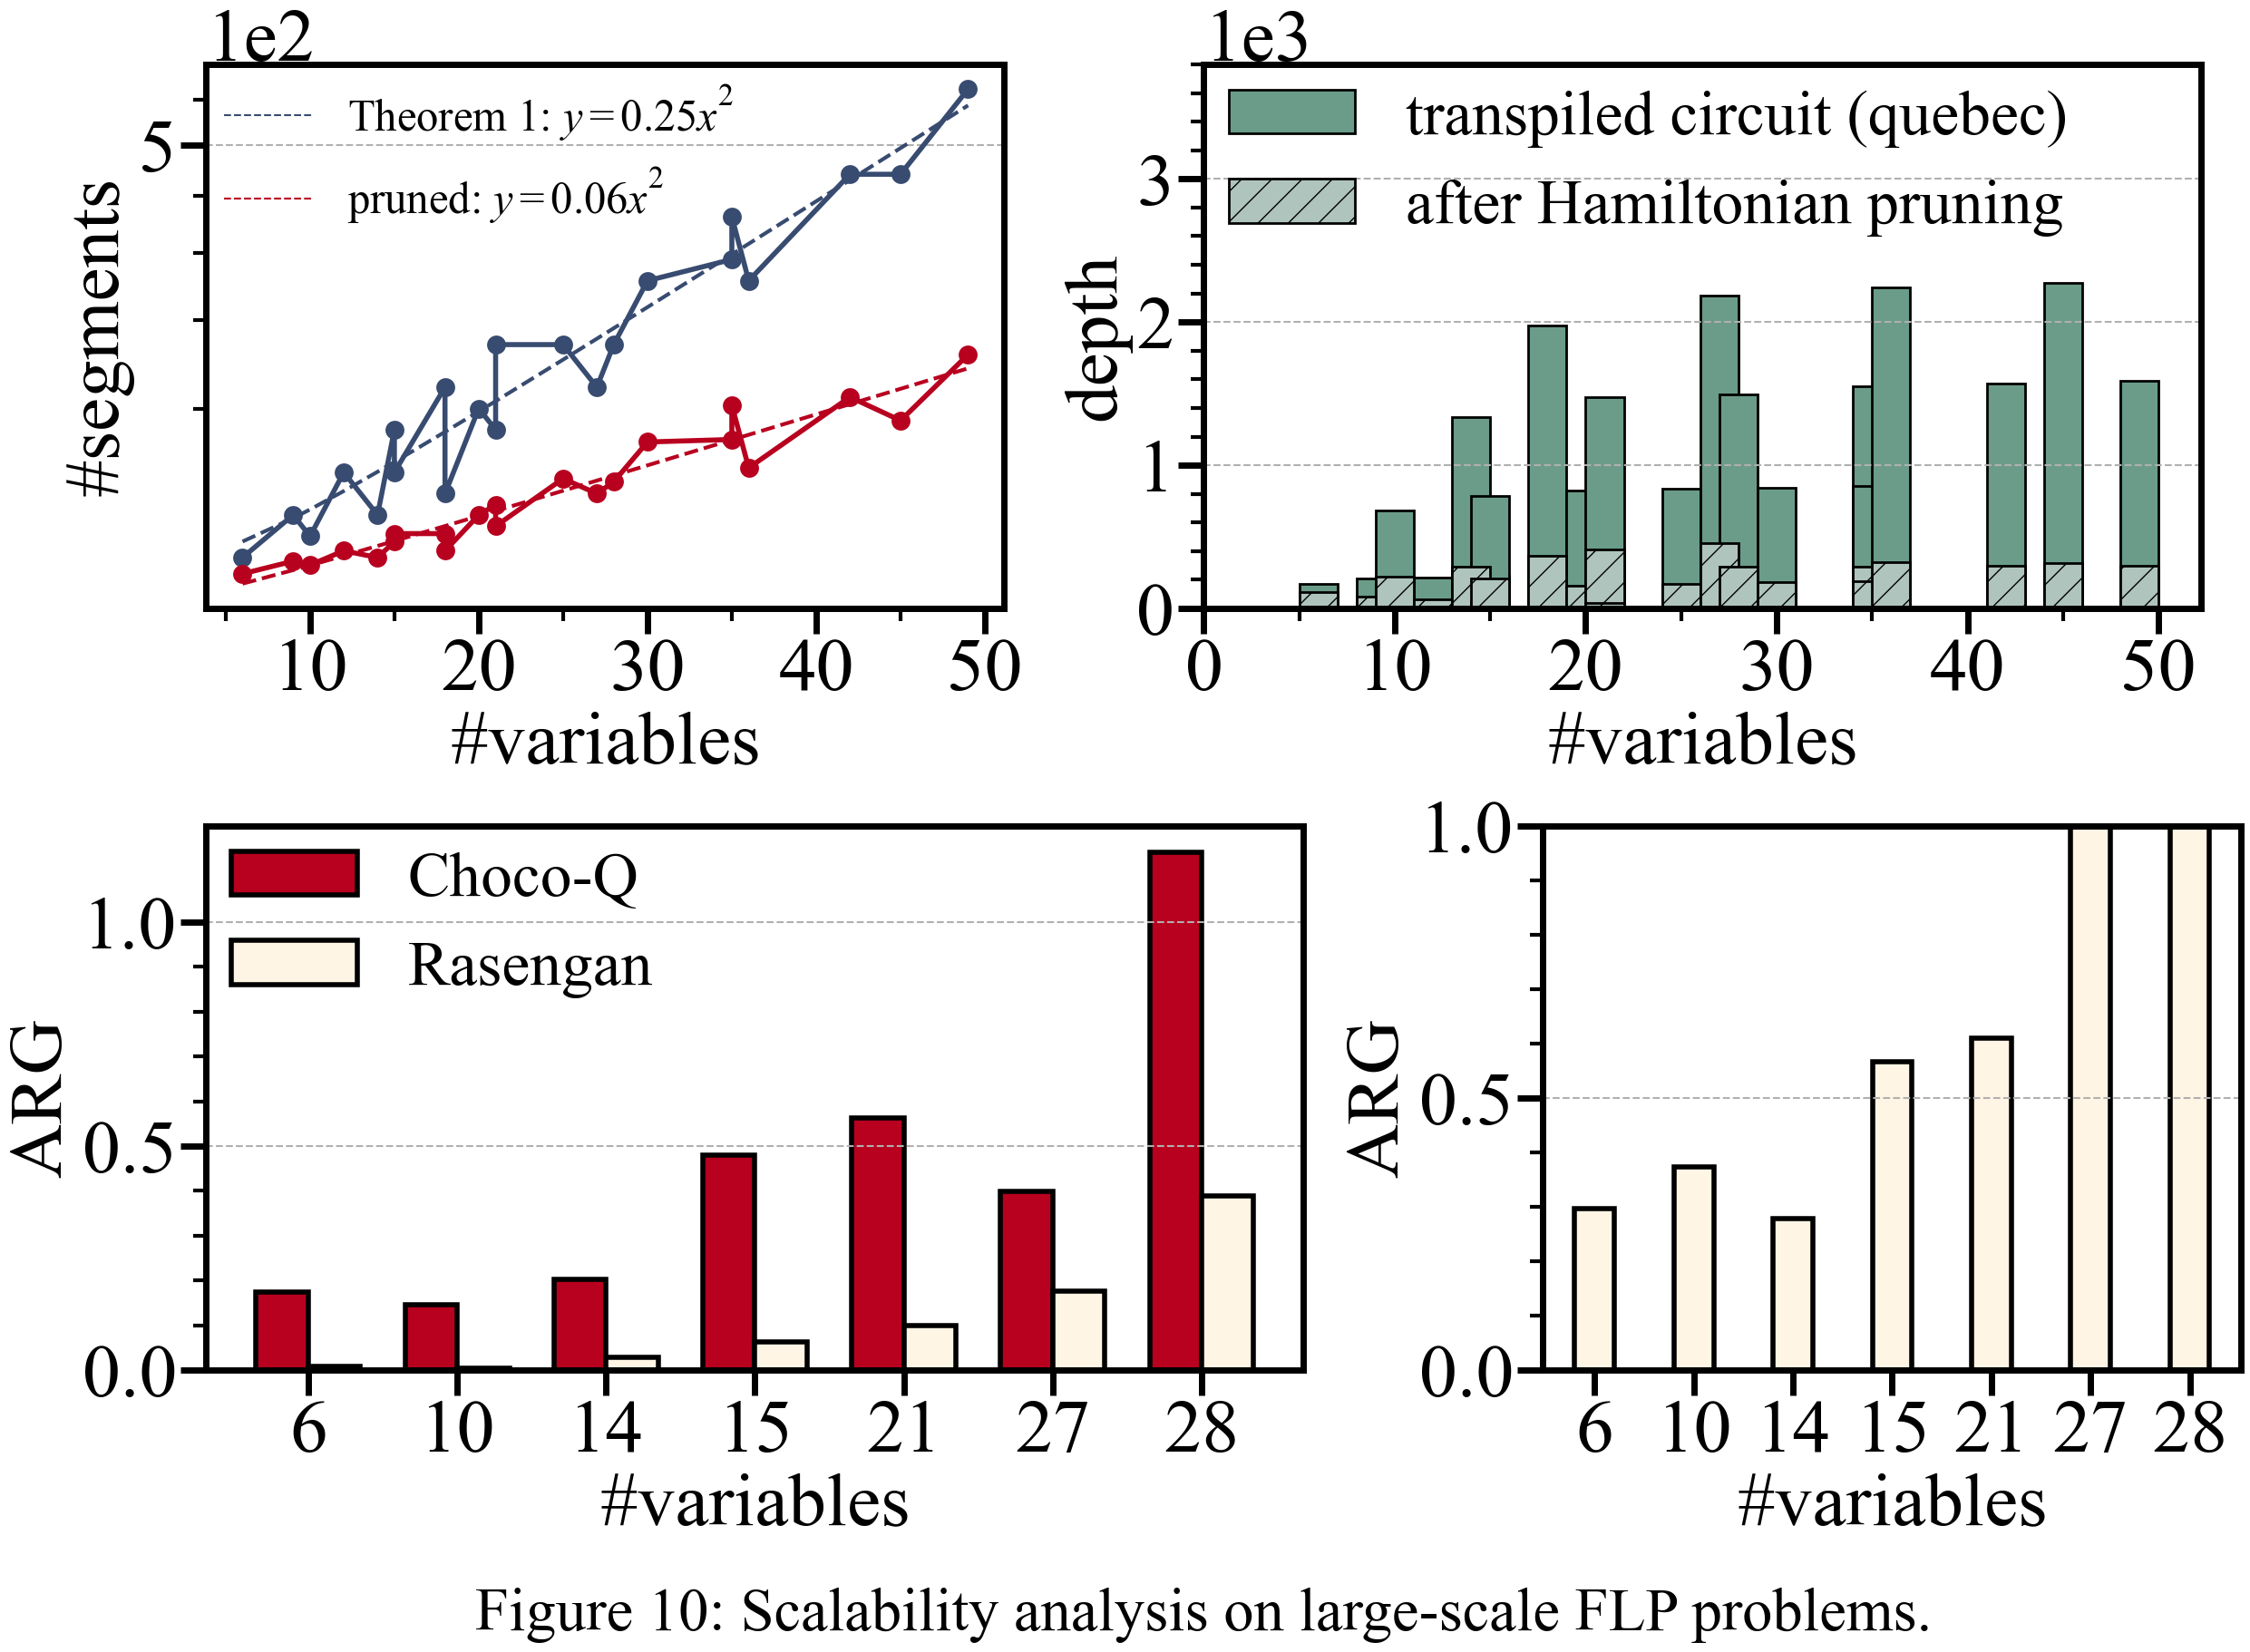

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    "lines.markersize": 35,
    "lines.markeredgewidth": 4,
    "markers.fillstyle": 'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})

fig = plt.figure(figsize=(22, 12))

ax1 = plt.axes([0, 0.7, 0.4, 0.5])
ax2 = plt.axes([0.5, 0.7, 0.5, 0.5])
ax3 = plt.axes([0, 0, 0.55, 0.5])
ax4 = plt.axes([0.67, 0, 0.35, 0.5])

ax1.plot(df_sorted['variables'], df_sorted['num_params'], marker='o', linestyle='-', 
         color='#384B70', linewidth=4, markersize=15, markeredgewidth=0, markerfacecolor='#384B70')
ax1.plot(df_sorted['variables'], df_sorted['num_params_2'], marker='o', linestyle='-', 
         color='#B8001F', linewidth=4, markersize=15, markeredgewidth=0, markerfacecolor='#B8001F')

ax1.set_xlabel('#variables')
ax1.set_ylabel('#segments')
ax1.grid(True, linestyle='--', linewidth=1.5, axis='y')
ax1.set_yscale('function', functions=(lambda x: np.sqrt(x), lambda x: x**2))
ax1.set_yticks(np.arange(0, 2600, 500))
ax1.set_yticks(np.arange(0, 2600, 100), minor=True)
ax1.set_xticks(np.arange(0, 51, 10))
ax1.set_xticks(np.arange(0, 51, 5), minor=True)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

def plot_fit_line(x, y, color, ax, str):
    coef = np.polyfit(x, y, 2)
    poly = np.poly1d(coef)
    ax.plot(x, poly(x), color=color, linestyle='--', linewidth=3)
    a, b, c = coef
    eq_str = f"{str}: $y = {a:.2f}x^2$"
    ax.plot([], [], linestyle='--', color=color, label=eq_str)

plot_fit_line(df_sorted['variables'], df_sorted['num_params'], '#384B70', ax1, "Theorem 1")
plot_fit_line(df_sorted['variables'], df_sorted['num_params_2'], '#B8001F', ax1, "pruned")
ax1.legend(
    loc='upper left', ncol=1, frameon=False,
    bbox_to_anchor=(0, 1), mode="expand", borderaxespad=0,
    fontsize=35
)


ratio_1 = df_sorted['depth'] / df_sorted['num_params']
ratio_2 = df_sorted['depth_2'] / df_sorted['num_params']

ax2.bar(df_sorted['variables'], ratio_1, width=2, color='#6A9C89', edgecolor='black', linewidth=2, label="transpiled circuit (quebec)")
ax2.bar(df_sorted['variables'], ratio_2, width=2, color='#afc4bc', hatch='/', edgecolor='black', linewidth=2, label="after Hamiltonian pruning")
ax2.legend(
    loc='upper left', ncol=1, frameon=False,
    bbox_to_anchor=(0, 1), mode="expand", borderaxespad=0,
    fontsize=50
)

ax2.set_xlabel('#variables')
ax2.set_ylabel('depth')
ax2.grid(True, linestyle='--', linewidth=1.5, axis='y')
ax2.set_yticks(np.arange(0, 4000, 1000))
ax2.set_yticks(np.arange(0, 4000, 200), minor=True)
ax2.set_xticks(np.arange(0, 51, 10))
ax2.set_xticks(np.arange(0, 51, 5), minor=True)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# 

colors = ['#B8001F', '#FFF5E4', '#FFF']

arg_data = pivot_df_1['ARG']
bar_width = 0.35
pkid_values = arg_data.index.unique()
index = np.arange(len(pkid_values))

label_list = ["Choco-Q", "Rasengan"]
for idx, method in enumerate(arg_data.columns):
    ax3.bar(index + idx * bar_width, arg_data[method].values, bar_width,
            label=label_list[idx], color=colors[idx % len(colors)], edgecolor="black", linewidth=4)

ax3.legend(
    loc='upper left', ncol=1, frameon=False,
    bbox_to_anchor=(0, 1), mode="expand", borderaxespad=0,
    fontsize=50
)
ax3.set_xlabel('#variables', fontsize=60)
ax3.set_ylabel('ARG', fontsize=60)
ax3.set_xticks(index + bar_width * (len(arg_data.columns) / 2 - 0.5))
ax3.set_xticklabels(pkid_values)
ax3.grid(True, linestyle='--', linewidth=1.5, axis='y')
ax3.set_yticks([i / 10 for i in range(0, 11, 5)])
ax3.set_yticks([i / 10 for i in range(0, 11, 1)], minor=True)

arg_data_2 = pivot_df_2['ARG']
bar_width = 0.4
pkid_values_2 = arg_data_2.index.unique()
index_2 = np.arange(len(pkid_values_2))

for idx, method in enumerate(arg_data_2.columns):
    ax4.bar(index_2 + idx * bar_width / 2, arg_data_2[method].values, bar_width,
            label=method, color=colors[1], edgecolor="black", linewidth=4)

ax4.set_xlabel('#variables', fontsize=60)
ax4.set_ylabel('ARG', fontsize=60)
ax4.set_xticks(index_2)
ax4.set_xticklabels(pkid_values_2)
ax4.grid(True, linestyle='--', linewidth=1.5, axis='y')
ax4.set_ylim(0, 1)
ax4.set_yticks([i / 10 for i in range(0, 11, 5)])
ax4.set_yticks([i / 10 for i in range(0, 11, 1)], minor=True)

title = "Figure 10: Scalability analysis on large-scale FLP problems"
plt.suptitle(title, y=-0.2, fontsize=48)
plt.savefig(f'{title}.svg', bbox_inches='tight')
plt.show()